NL2DS - Winter 2023

Assignment 4 -- Psycholinguistic data and regression

In this assignment we will work with several real psycholinguistics datasets. These datasets are inspired by discussion in this [book](https://osf.io/pnumg/) by McGill Linguistics Professor Morgan Sondregger. 

The first part of the problem set will examine some lexical decision data. You can read about lexical decision experiments in the wikipedia article [here](https://en.wikipedia.org/wiki/Lexical_decision_task). (The first dataset also contains so-called *speeded naming* data. You can read about that in the speeded naming section of the first paper.)

The collection of the lexical decision data is originally described in. 

Balota, D. A., Cortese, M. J., Sergent-Marshall, S. D., Spieler, D. H., and Yap, M. J. (2004). [Visual word recognition of single-syllable words](https://drive.google.com/file/d/1TkFrg1jg0AK-9ZnKU5YXNVubdVUeNXbL/view?usp=sharing/). Journal of Experimental Psychology: General, 133(2):283–316.

In the following paper, this data was reanalyzed using some new features (predictors).

R. H. Baayen, L. Feldman, and R. Schreuder. [Morphological Influences on the Recognition of Monosyllabic Monomorphemic Words](https://drive.google.com/file/d/1USv3o6PXzocFtSggbcFn2fxYYrJ-pBcI/view?usp=sharing). Journal of Memory and Language, 53:496– 512, 2006. You can find a copy of this paper.

This data is discussed in Harald Baayen's book on linguistic data analysis.

Baayen, R. H. (2008). [Analyzing Linguistic Data: A practical introduction to statistics](https://drive.google.com/file/d/1RnQLXbzMARsEm8s8PFTYiSlaMc-vZ8Xa/view?usp=sharing). Cambridge University Press.

This particular file  was derived from the original data available as as the `english` dataframe of the [languageR package](https://cran.r-project.org/web/packages/languageR/index.html/).

Copy the data to your drive folder from: https://drive.google.com/file/d/19ybVdUWwZh_hSw69DRG7rYJd8o5dKWFK/view?usp=sharing.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/colab/english.csv"


Mounted at /content/drive/
'/content/drive/My Drive/colab/english.csv'


***Problem 1***

Use [Pandas](https://pandas.pydata.org/docs/user_guide/index.html) to read the CSV file into a dataframe and then have a look at the data set.




In [ ]:
import pandas as pd

# Problem 1: Display the dataset.

# Put your answer here
file_path = "/content/drive/My Drive/colab/english.csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.describe())


   RTlexdec  RTnaming  Familiarity    Word AgeSubject WordCategory  \
0  6.543754  6.145044         2.37     doe      young            N   
1  6.304942  6.143756         5.60  stress      young            N   
2  6.424221  6.131878         3.87    pork      young            N   
3  6.450597  6.198479         3.93    plug      young            N   
4  6.531970  6.167726         3.27    prop      young            N   

   WrittenFrequency  WrittenSpokenFrequencyRatio  FamilySize  \
0          3.912023                     1.021651    1.386294   
1          6.505784                     2.089356    1.609438   
2          5.017280                    -0.526334    1.945910   
3          4.890349                    -1.044545    2.197225   
4          4.770685                     0.924801    1.386294   

   DerivationalEntropy  ...    ConfbN  NounFrequency  VerbFrequency  CV  \
0              0.14144  ...  8.833900             49              0   C   
1              0.06197  ...  5.817111       



```
# This is formatted as code
```

***Question 1:*** Your first job is to familiarize yourself with the dataset by briefly examining the two papers above. First, read the wikipedia article on lexical decision, and briefly (2-4 sentences) explain the lexical decision experimental task.

**Q1: put your answer here (please keep it brief, 2-3 sentences)**

In simple meaning, the lexical decision task is a procedure used to understand how our brain processes language. In this test, people are shown a mix of real words and made-up words (pseudowords) and asked to quickly decide if what they see is a real word or not.

Start with the earlier paper then move on to the later paper. Note these two papers are long and use a lot of technical jargon from the field of psycholinguistics. *Reading each paper carefully would take several hours and you probably would not be able to understand everything unless you have previous familiarity with experimental psychology.*  This is not the goal of this part of the assignment. Instead, the goal is to just familiarize yourself as efficiently as possible with what some of the columns in the data set mean. An important skill in data science is quickly evaluating the high level idea and questions studied in a paper and finding the places where quantitites are defined, without doing a careful reading.

A good way to approach this is to first read the abstract, the introduction and the conclusion and then have a look at the figures, always keeping in mind the data from the CSV above and trying to find interpretations for the various columns. Don't get stuck on stuff you don't understand unless you are pretty sure you need to understand it to answer the question.

Focus on figuring out where you can find the relevant information to answer the following questions. 

***Question 2:*** In these studies and in this dataset various regression models are used to analyze the experimental data. What was measured in these studies that corresponds to $\mathbf{y}$ in our notation from class (i.e., the quantities to be predicted) and which columns in the dataset have these values?

**Q2: put your answer here (please keep it brief, 2-3 sentences)**

two tasks were used to measure performance in visual word recognition: speeded visual word naming and lexical decision performance. the columns corresponding to 𝐲 values are:
1. RTlexdec: Reaction times for the lexical decision task.
2. RTnaming: Reaction times for the speeded visual word naming task.

***Question 3:*** In both papers a number of different quantities are used as predictors for the experimental measures. These correspond to the columns of our $\mathbf{X}$ matrix from class. Note that between these two papers there are a lot of variables, and this a lot of columns in the table. Please determine the meaning of the first seven features from these papers (`Familiarity` to `FamilySize`).

**Q3: put your answer here (please keep it brief, 1-2 sentences/predictor)**

Familiarity: A measure of how familiar a word is to participants, usually rated on a scale. It indicates the perceived frequency of a word based on participants' subjective judgment.

Word: The actual word being used in the experiment for the lexical decision or naming task.

AgeSubject: The age group of participants to whom the word is familiar. The categories typically include young and older adults.

WordCategory: The grammatical category of the word, such as noun (N), verb (V), or adjective (A).

WrittenFrequency: The frequency of the word's occurrence in written text, typically measured using a large text corpus. A higher value indicates the word appears more frequently in written text.

WrittenSpokenFrequencyRatio: The ratio of a word's frequency in written text to its frequency in spoken language. It is the difference in usage between written and spoken contexts.

FamilySize: A measure of morphological connectivity. It represents the number of morphologically related words, A higher value indicates more morphologically related words can be derived from the base word.

***Question 4:*** For each of these predictors, how would you intuitively expect it to relate to the reactions times in the $\mathbf{y}$ variables? (Note that there is no right or wrong answer here, so long as you give a justification for your reasoning). Please be brief, no more than 2-4 sentences per predictor.

**Q4: put your answer here (please keep it brief, 1-2 sentences/predictor)**

Familiarity: Higher familiarity would likely lead to faster reaction times. The participants can more easily recognize and process words they are familiar with.

Word: The relationship between the specific word and reaction times would depend on word length, phonetic complexity, and semantic associations. Shorter words with simpler phonetic structures might result in faster reaction times.

AgeSubject: Younger participants generally have faster reaction times due to better cognitive processing speed. Older adults could have faster reaction times for words that are more familiar to them, becuase they have had more exposure to these words over time.

WordCategory: Different word categories might have varying effects on reaction times. For instance, nouns might be processed more quickly because they often represent concrete objects, while verbs or adjectives may require more cognitive effort to process due to their relational or descriptive nature.

WrittenFrequency: Higher written frequency would likely lead to faster reaction times, as participants would have encountered these words more often, resulting in a stronger neural representation and more efficient processing.

WrittenSpokenFrequencyRatio: A high ratio could suggest that the word is more common in written language than spoken language. 

FamilySize: A larger family size might result in faster reaction times.

Let's simplify the dataset a bit, to have fewer columns. 

***Problems 2-5***

In [ ]:
# Problem 2: Write some code that drops all of the columns from the 
# English dataset past the 9th column (the last column should be FamilySize)

# Put your answer here
df = df.iloc[:, :9]

# Display the updated DataFrame
print(df.head())


   RTlexdec  RTnaming  Familiarity    Word AgeSubject WordCategory  \
0  6.543754  6.145044         2.37     doe      young            N   
1  6.304942  6.143756         5.60  stress      young            N   
2  6.424221  6.131878         3.87    pork      young            N   
3  6.450597  6.198479         3.93    plug      young            N   
4  6.531970  6.167726         3.27    prop      young            N   

   WrittenFrequency  WrittenSpokenFrequencyRatio  FamilySize  
0          3.912023                     1.021651    1.386294  
1          6.505784                     2.089356    1.609438  
2          5.017280                    -0.526334    1.945910  
3          4.890349                    -1.044545    2.197225  
4          4.770685                     0.924801    1.386294  


# **Now** use the [Seaborn library](https://seaborn.pydata.org/) to produce a set of plots between (see `pairplot`) all the variables in the dataset.

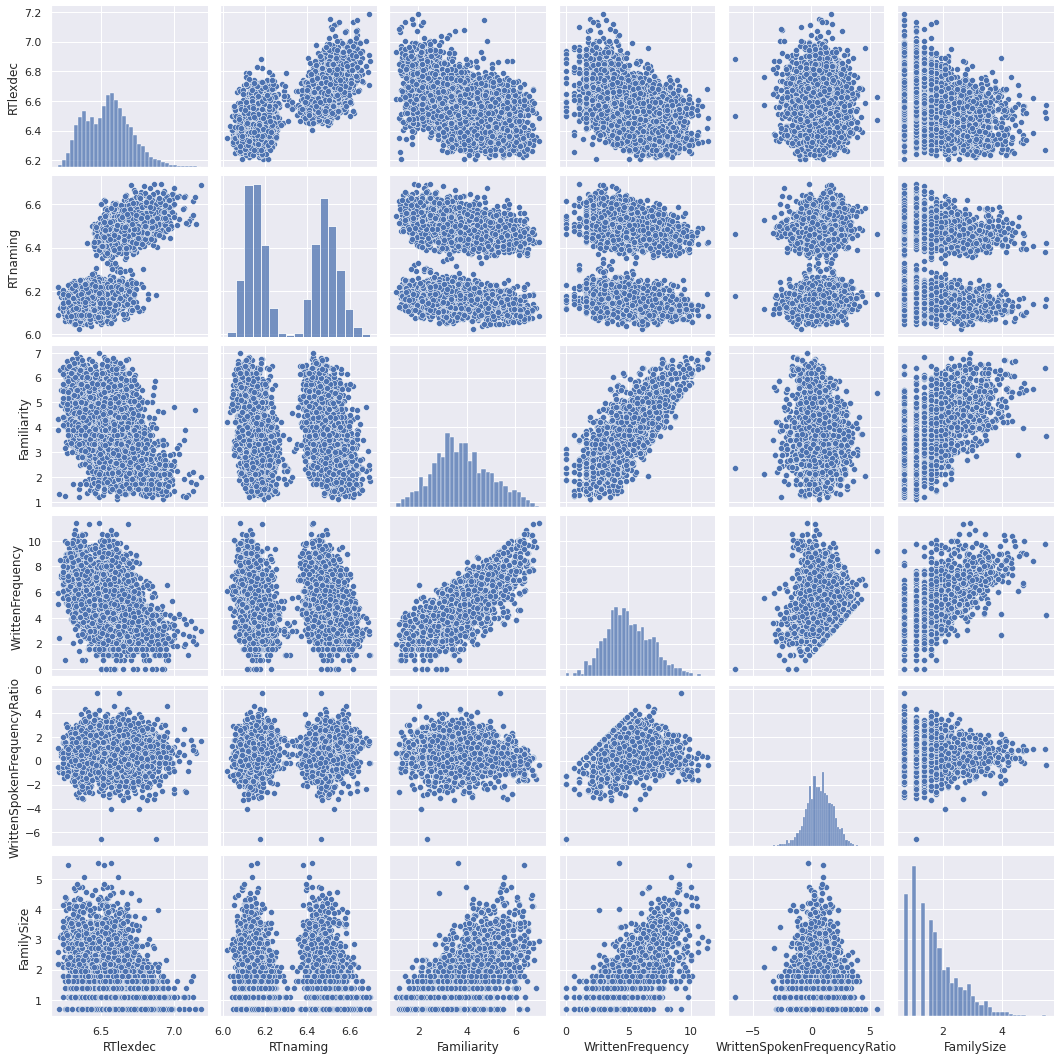

In [ ]:
import seaborn as sns; sns.set()
sns.pairplot(df)

Let's focus on the subset of the data from young participants.

In [ ]:
# Problem 3: Write an expression that selects the subset of rows which correspond to the young speakers.

# Put your answer here
df_young = df[df['AgeSubject'] == 'young']

# Display the updated DataFrame
print(df_young.head())

   RTlexdec  RTnaming  Familiarity    Word AgeSubject WordCategory  \
0  6.543754  6.145044         2.37     doe      young            N   
1  6.304942  6.143756         5.60  stress      young            N   
2  6.424221  6.131878         3.87    pork      young            N   
3  6.450597  6.198479         3.93    plug      young            N   
4  6.531970  6.167726         3.27    prop      young            N   

   WrittenFrequency  WrittenSpokenFrequencyRatio  FamilySize  
0          3.912023                     1.021651    1.386294  
1          6.505784                     2.089356    1.609438  
2          5.017280                    -0.526334    1.945910  
3          4.890349                    -1.044545    2.197225  
4          4.770685                     0.924801    1.386294  


Let's examine the relationship between the written frequency of a word on it's 
lexical decision time. Use  [`seaborn.regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html) to make a plot with a linear trend line that 
has the fequency on the $x$-axis and lexical decision time on the $y$-axis.

You may also find this page useful in understanding how to use Seaborne to plot regression lines: https://seaborn.pydata.org/tutorial/regression.html


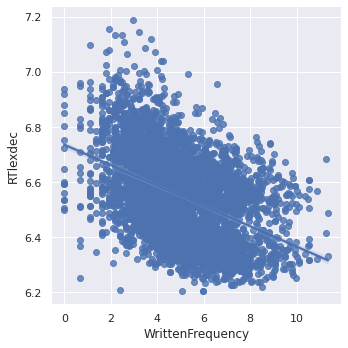

In [ ]:
#Problem 4: use seaborne.regplot to plot the data with a best fit regressions line.

# Put your answer here
sns.lmplot(x="WrittenFrequency", y="RTlexdec", data=df);


In order to examine wether or the relationship between two variables is really linear, it is useful to look at a *locally-smoothed regression line* that relates the $x$ and $y$ axes of a plot. This is a kind of regression model where the function is refit localy for many subsets of the data then a smooth line is interpolated between these points. One standard technique for this is known as *locally weighted scatterplot smoothing* or [LOWESS](https://en.wikipedia.org/wiki/Local_regression) and is implemented as an option for the line drawn by the `regplot` function. Using this examine whether the relationship between frequency and lexical decision times really looks linear.

<Axes: xlabel='WrittenFrequency', ylabel='RTlexdec'>

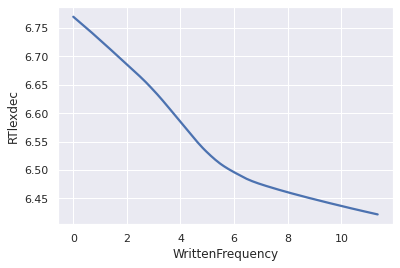

In [ ]:
#Problem 5: use seaborne.regplot to mnake a plot with the best fit LOWESS line.

# Put your answer here
sns.regplot(x="WrittenFrequency", y="RTlexdec", data=df, lowess=True, scatter=False )

***Question 5***: What do you see in this data when you look at the two plots above? Do you think that a linear model represents the relationship between written frequency and reaction times? It may be useful  to turn on an off the plotting of the underlying data points with the `scatter=False` argument to the functions.



**Q5: put your answer here**

The plot with the linear regression line might not capture the relationship between written frequency and reaction times accurately since the data points don't seem to follow a strict linear pattern. The plot with the LOWESS line, on the other hand, adapts to the local structure of the data and provides a better visualization of the relationship between the two variables.

Let's try looking at some more complex models of the relationship between frequency and lexical decision time. Here is some starter code similar to those that we looked at in class for writing a polynomial regression. Complete the code as indicated.


***Problems 6-9***

Model class: Linear Regression
	Degree 1
		Train R^2: 0.42403927186408297
		Test R^2: 0.3210939614227186
	Degree 2
		Train R^2: 0.44436967450777265
		Test R^2: 0.320109824512682
	Degree 3
		Train R^2: 0.4619137563988218
		Test R^2: 0.331296578467405
	Degree 4
		Train R^2: 0.4705198262751925
		Test R^2: 0.3401989706400178
	Degree 5
		Train R^2: 0.47052035215155297
		Test R^2: 0.3401653611450798
	Degree 6
		Train R^2: 0.47171929416375336
		Test R^2: 0.3413840540459021
	Degree 7
		Train R^2: 0.4717940795761968
		Test R^2: 0.3420747488899549
	Degree 20
		Train R^2: 0.46467163960842883
		Test R^2: 0.3316374446379293
	Degree 25
		Train R^2: 0.33935696882297506
		Test R^2: 0.2607235305449904


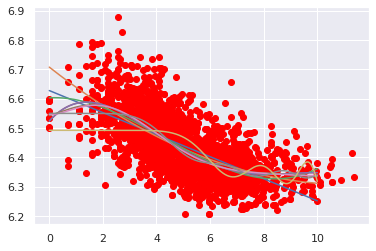

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Problem 6: Set up variable X (For features) and y from the input data.

X = df_young[['WrittenFrequency']].values
y = df_young['RTlexdec'].values


# Problem 7: split this into test and train subsets, with 10% of the data in test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


X_plot = np.linspace(0, 10,5000).reshape(-1, 1)
plt.scatter(X_train, y_train, color='red')

print("Model class: " + "Linear Regression")
for degree in [1,2,3,4,5,6,7,20,25]:
  # Problem 8: fit a polynomial regression model of each degree above

  # Put your answer here
  model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

  model.fit(X_train, y_train)
  
  print("\tDegree " + str(degree) +"\n\t\tTrain R^2: "+ str(model.score(X_train,y_train)))
  print("\t\tTest R^2: "+ str(model.score(X_test,y_test)))  

  # Problem 9: use plt.plot to add a line to the plot for this model using the X_plot points.

  y_plot = model.predict(X_plot)
  plt.plot(X_plot, y_plot, label=f'Degree {degree}')


***Question 6:*** Which degree polynomial provided the best fit to this dataset? What does this say about the relationship between frequency and lexical decision times?

**Q6: put your answer here (please keep it brief, 2-4 sentences)**

Based on the provided R^2 scores, the best fit for this dataset is the model with a polynomial degree of 7. This result indicates that the relationship between frequency and lexical decision times is not linear because higher-degree polynomial models provide a better fit to the data. I

***Problem 10***

Model class: Lasso Regression
	Alpha 0.1
		Train R^2: 0.1640863833005869
		Test R^2: 0.140374561077255
	Alpha 1
		Train R^2: 0.0
		Test R^2: -0.0032628171549702323
	Alpha 10
		Train R^2: 0.0
		Test R^2: -0.0032628171549702323
Model class: Ridge Regression


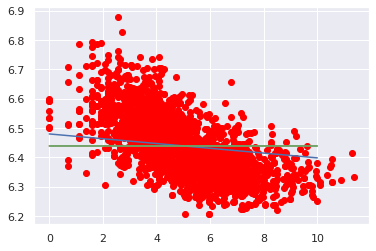

In [ ]:
# Problem 10: Repeat the above analyses using Lasso and Ridge regression.

from sklearn.linear_model import Lasso, Ridge

X_plot = np.linspace(0, 10, 5000).reshape(-1, 1)
plt.scatter(X_train, y_train, color='red')

# Lasso Regression
print("Model class: Lasso Regression")
for alpha in [0.1, 1, 10]:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    
    print("\tAlpha " + str(alpha) +"\n\t\tTrain R^2: "+ str(model.score(X_train, y_train)))
    print("\t\tTest R^2: "+ str(model.score(X_test, y_test)))

    plt.plot(X_plot, model.predict(X_plot), label=f'Alpha {alpha}')

# Ridge Regression
print("Model class: Ridge Regression")
for alpha in [0.1, 1, 10]:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

***Question 7:*** What did you find using these regularization techniques? How were they similar or different to eachother and the results above? Why?

**Q7: put your answer here (please keep it brief, 4-6 sentences)**

The results show that, for alpha values of 0.1, 1, and 10, the training R^2 values are quite low compared to the polynomial regression results from the previous analysis. Thus, we can conclude that the regularization technique used here is not providing a better fit to the data than the polynomial regression models. It might be beneficial to try a wider range of alpha values

Now we will look at aniother dataset available [here](https://drive.google.com/file/d/1eaQSqiJFyrsDprmsKzZ0ysxBUmyBzVGX/view?usp=sharing).

This dataset is about morphological *regularity*&mdash;the property of whether words marke certain information like tense using regular endings (e.g., *walk*/*walked*) or irregular processes (e.g., *sing*/*sang*). The dataset consists of a Dutch verbs and is described in the following paper.


Tabak, W. M., Schreuder, R., and Baayen, R. H. (2005). [Lexical statistics and lexical processing: Semantic density, information complexity, sex, and irregularity in Dutch.](https://drive.google.com/file/d/1WRqjc7MwbCiSgOXESszBfxclnxQgAhu5/view?usp=sharing) In Kesper, S. and Reis, M., editors, Linguistic Evidence — Empirical, Theoretical, and Computational Perspectives, pages 529–555. Mouton de Gruyter, Berlin, Germany.



Figure 1 in the paper displays the correlations between various factors (features) and predictability.


***Problem 11***

In [ ]:
#Problem 11: Read in the regularity dataset and familiarize yourself with it.

# Put your answer here
file_path = "/content/drive/My Drive/regularity.csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.describe())


   Unnamed: 0     Verb  WrittenFrequency  FamilySize  LengthInLetters  \
0           1   stelen          1.609438    2.564949                5   
1           2   tollen          5.411646    2.397895                3   
2           3  blijken          9.883183    1.791759                5   
3           4  gloeien          6.908755    2.079442                5   
4           5   kakken          3.784190    2.079442                3   

   VerbalSynsets  MeanBigramFrequency  NcountStem Regularity  \
0              1                14.47           9    regular   
1              1                13.61          26    regular   
2              1                13.84           6  irregular   
3              3                12.95           4    regular   
4              1                13.48          24    regular   

   InflectionalEntropy Auxiliary  Valency   NVratio  WrittenSpokenRatio  
0              1.00000    hebben        3  4.366913           -2.302585  
1              2.48640   zij

***Question 8***: Briefly describe what each of the 5 factors  excluding  inflectional entropy, log argument structures, and log N-count means and what relationship it shows to regularity.


**Q8: put your answer here. (no more than 1-2 sentences per factor)**

WrittenFrequency: represents the log-transformed frequency of the verb in written texts.

FamilySize: represents the log-transformed count of words derived from the same root verb.

LengthInLetters: refers to the number of letters in the verb.

VerbalSynsets: This factor indicates the number of verbal synsets

MeanBigramFrequency: represents the average frequency of bigrams within the verb.

In this section, we will focus on the relationship between `FamilySize` and `Regularity`. Unlike in the last dataset, regularity is not a continuous value, but rather a binary variable. Thus we will need to use a classification model to examine it.

For this pupose, we will use logistic regression.

***Problems 12-15***

[0.765079365079365, 0.7285714285714285]

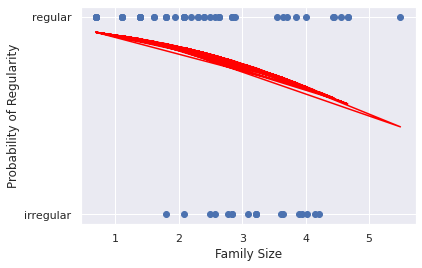

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Problem 12: set up X as FamilySize, y as Regularity in 
#preparation to use them to fit a logistic regression model.

# Put your answer here

X = df[['FamilySize']]
y = df['Regularity']
#Problem 13: split X, and y into train and test with 10% test split. And also create
# and X_plot variable for plotting.

# Put your answer here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


#Problem 14: fit a logistic regression model on this data

# Put your answer here
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

display([accuracy_score(y_train, lr_model.predict(X_train)),accuracy_score(y_test, lr_model.predict(X_test))])

#Problem 15: using plt.plot make a scatter plot of the data along with the predicted 
# probability of regularity as a function of family size. you will find the "predict_proba" function helpful.

# Put your answer here
plt.scatter(X_test, y_test)

# generate predicted probabilities for the test data
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]

# plot the predicted probabilities as a function of family size
plt.plot(X_test, y_pred_prob, color='red')
plt.xlabel('Family Size')
plt.ylabel('Probability of Regularity')
plt.show()


*** *italicized text*Question 9***: What do you see in the fit to the logistic regression? How does the probability of being regular vary with morphological family size?

**Q9: put your answer here. (no more than 2-4 sentences)**

The logistic regression graph from above shows that the probability of a word being regular decreases as the family size increases. This trend is also clear in both the training and testing sets, which is indicated by the accuracy scores.

***Question 10***: What does the relationship on Figure 1 of the paper look like? Does this match your analysis above?

**Q10: put your answer here. (no more than 2-4 sentences)**

In class, we saw an example of a regression problem in which the curve was best fit by a polynomial. We can, of course, use polynomial relationships in a classification model as well. Let's take a similar approach to the analysis that we just did, except first transforming our input features polynomially.

***Problems 16-19***

Model class: Logistic Regression


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: ignored

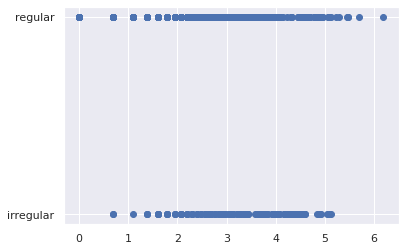

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
import  scipy

#Problem 16: Set up X, y, test and train as above.

# Put your answer here

X = df[['FamilySize']]
y = df['Regularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_plot = np.linspace(0, 6,5000).reshape(-1, 1)


#Problem 17: Plot the data points using plt.scatter.

# Put your answer here
plt.scatter(X_train, y_train)


print("Model class: " + "Logistic Regression")
for degree in [1,2,3,4,5]:

  #Problem 18: set up a logistic regression model with polynomial features of degree and train it.

  # Put your answer here
  poly = PolynomialFeatures(degree)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)
  lr_model = LogisticRegression()
  lr_model.fit(X_train_poly, y_train)

  print("\tDegree " + str(degree) +"\n\t\tTrain R^2: "+ str(accuracy_score(y_train, lr_model.predict(X_train))))
  print("\t\tTest R^2: "+ str(accuracy_score(y_test, lr_model.predict(X_test))))
  

  #Problem 19: Plot the resulting predicted probability line on the plot.

  # Put your answer here
  X_plot_poly = poly.transform(X_plot)
  y_plot_proba = lr_model.predict_proba(X_plot_poly)[:, 1]
  plt.plot(X_plot, y_plot_proba, label='Degree {}'.format(degree))


***Question 11***: What do you see in the fit of these polynomial features? What is the relationship in plain English between the family size variable and the probability of being regular?

**Q11: put your answer here. (no more than 2-4 sentences)**

As the degree of the polynomial features increases, the model becomes more complex and starts to overfit the training data. 

***Question 12***: Speculate as to why this relationship might hold theoretically?




**Q12: put your answer here. (no more than 2-4 sentences)**

One possible explanation as to "why relationship between family size and regularity might hold" is that it reflects the way that words are learned and represented in the brain. When a new word is learned, it is often stored in memory as a set of morphemes that can be combined in different ways to form new words. If a language has a high degree of regularity, then it may be easier to learn and remember new words since there are fewer exceptions to the rules. 

# To Submit
To submit, name this notebook `YOUR_STUDENT_ID_Assignment_4.ipynb`, then convert this `.ipynb` file to a `.pdf` (e.g., using the following instructions) and upload the PDF to the Gradescope assignment "Assignment 4 -- Psycholinguistic data and regression".

(Note: `Print > Save as PDF` **will not work** because it will not display your figures correctly.)

You can convert the notebook to a PDF using the following instructions.

# Converting this notebook to a PDF

1. Make sure you have renamed the notebook, e.g. `000000000_Assignment_4.ipynb` where `000000000` is your student ID.
2. Make sure to save the notebook (`ctrl/cmd + s`).

2. Make sure Google Drive is mounted (it likely already is from the first question).

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/MyDrive/Colab Notebooks/"

3. Install packages for converting .ipynb to .pdf

In [ ]:
!apt-get -q install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libgs9
  libgs9-common libidn11 libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6
  libpdfbox-java libptexenc1 libruby2.7 libsynctex2 libteckit0 libtexlua53
  libtexluajit2 libzzip-0-13 lmodern poppler-data preview-latex-style rake
  ruby ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit
  ruby-xmlrpc ruby2.7 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf apache2 | lighttpd
  | httpd libavalon-framework-ja

4. Convert to PDF (replace `000000000` with your student ID)

In [ ]:
%env STUDENT_ID=260582309
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/${STUDENT_ID}_Assignment_4.ipynb"

env: STUDENT_ID=260582309
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/260582309_Assignment_4.ipynb to pdf
[NbConvertApp] Support files will be in 260582309_Assignment_4_files/
[NbConvertApp] Making directory ./260582309_Assignment_4_files
[NbConvertApp] Making directory ./260582309_Assignment_4_files
[NbConvertApp] Making directory ./260582309_Assignment_4_files
[NbConvertApp] Making directory ./260582309_Assignment_4_files
[NbConvertApp] Making directory ./260582309_Assignment_4_files
[NbConvertApp] Making directory ./260582309_Assignment_4_files
[NbConvertApp] Making directory ./260582309_Assignment_4_files
[NbConvertApp] Writing 107206 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbC

5. Download the resulting PDF file. If you are using Chrome, you can do so by running the following code. On other browsers, you can download the PDF using the file mananger on the left of the screen (Navigate to the file > Right Click > Download).

In [ ]:
import os
from google.colab import files
files.download(f"/content/drive/MyDrive/Colab Notebooks/{os.environ['STUDENT_ID']}_Assignment_4.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6. Verify that your PDF correctly displays your figures and responses.